In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


In [155]:
tweets_sentiments = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_20210101-20210930.csv', index_col = 0)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [156]:
tweets_sentiments.head()


,id,date,text,hashtags,replyCount,retweetCount,likeCount,userName,userFollowerCount,userFavCount,userFriendCount,dateTime,textLength,prediction,negative,neutral,positive
0,1443727347832791045,2021-09-30 23:59:57+00:00,btc ends q3 +26.7%,NaN,2.0,0.0,45.0,tier10k,6614.0,4029.0,1620.0,2021-09-30 23:59:57+00:00,18,neutral,0.0145,0.7970,0.1886
1,1443727346670845993,2021-09-30 23:59:57+00:00,exchange or exchange of new crypto assets usua...,"['euler', 'bsc', 'crypto', 'ethereum']",0.0,1.0,1.0,Rofiqul52509717,3311.0,5963.0,4968.0,2021-09-30 23:59:57+00:00,197,positive,0.0021,0.2555,0.7424
2,1443727338575958019,2021-09-30 23:59:55+00:00,returns over the last 10 years: bitcoin $btc: ...,NaN,0.0,0.0,1.0,iamfkr2,8.0,152.0,151.0,2021-09-30 23:59:55+00:00,266,negative,0.6298,0.3230,0.0472
3,1443727338169114633,2021-09-30 23:59:55+00:00,this whale isn't afraid of why should you be? ...,"['chinafud', 'bitcoin', 'cryptocurrency', 'cry...",0.0,0.0,0.0,welcomecatena,1409.0,8538.0,2099.0,2021-09-30 23:59:55+00:00,50,neutral,0.1539,0.7342,0.1119
4,1443727335878967296,2021-09-30 23:59:54+00:00,current bitcoin transaction fees: bch next blo...,NaN,0.0,0.0,0.0,BitcoinFeesCash,596.0,374.0,392.0,2021-09-30 23:59:54+00:00,117,neutral,0.1366,0.8302,0.0332


In [157]:
tweets_sentiments['dateTime']= pd.to_datetime(tweets_sentiments['dateTime'])


In [158]:
tweets_sentiments = tweets_sentiments[['id', 'dateTime', 'prediction']]

tweets_sentiments.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549484 entries, 0 to 3552412
Data columns (total 3 columns):
 #   Column      Dtype              
---  ------      -----              
 0   id          int64              
 1   dateTime    datetime64[ns, UTC]
 2   prediction  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 108.3+ MB


In [250]:
thirty_mins_span = tweets_sentiments.groupby('prediction').resample('30min', on='dateTime').count()

one_h_span = tweets_sentiments.groupby('prediction').resample('1H', on='dateTime').count()

two_h_span = tweets_sentiments.groupby('prediction').resample('2H', on='dateTime').count()

daily_span = tweets_sentiments.groupby('prediction').resample('D', on='dateTime').count()



In [251]:
thirty_mins_span = thirty_mins_span.unstack('prediction', fill_value=0)
thirty_mins_span = thirty_mins_span[('id')]

one_h_span = one_h_span.unstack('prediction', fill_value=0)
one_h_span = one_h_span[('id')]

two_h_span = two_h_span.unstack('prediction', fill_value=0)
two_h_span = two_h_span[('id')]

daily_span = daily_span.unstack('prediction', fill_value=0)
daily_span = daily_span[('id')]


In [253]:
two_h_span.index.name = None
two_h_span.columns.name = 'dateGroup'

#two_h_span.loc['2021-09-10':'2021-09-30']
daily_span.index.name = None
daily_span.columns.name = 'dateGroup'

#daily_span.loc['2021-09-10':'2021-09-30']

one_h_span.index.name = None
one_h_span.columns.name = 'dateGroup'

thirty_mins_span.index.name = None
thirty_mins_span.columns.name = 'dateGroup'


In [254]:
def calc_percentage(df):
    df['total'] = df['negative'] + df['neutral'] + df['positive']
    df['pos_percent'] = df['positive'] / df['total'] * 100 
    df['neu_percent'] = df['neutral'] / df['total'] * 100
    df['neg_percent'] = df['negative'] / df['total'] * 100

calc_percentage(thirty_mins_span)
calc_percentage(one_h_span)
calc_percentage(daily_span)
calc_percentage(two_h_span)


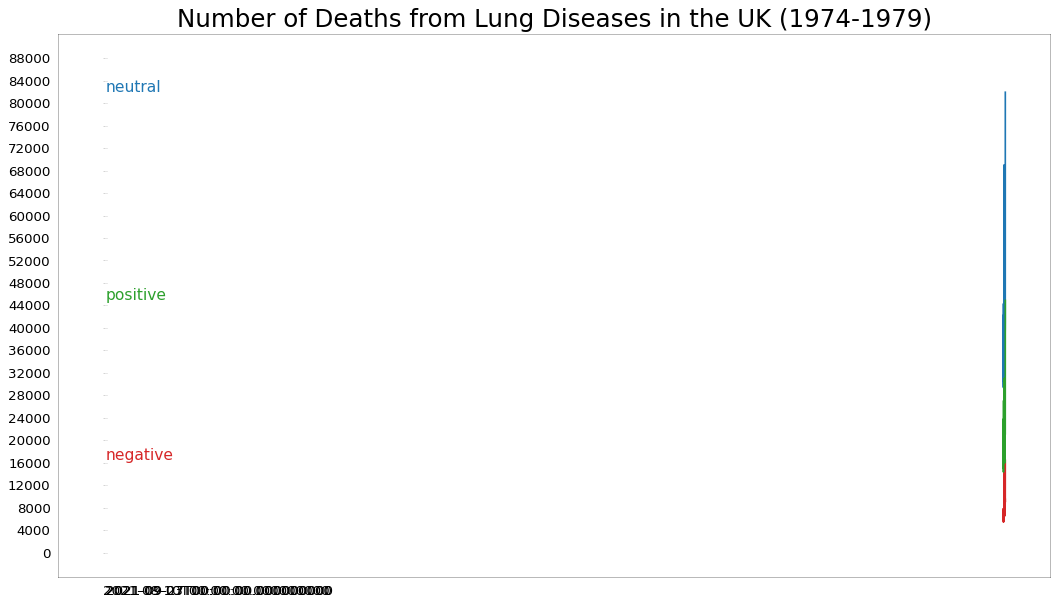

In [181]:
plot = daily_span

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 0
y_UL = int(plot.iloc[:, 1:].max().max()*1.1)
#y_UL = 50000
y_interval = 4000
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = plot.columns[:3]  
for i, column in enumerate(columns):    
    valt = plot[column].values
    plt.plot(plot.index.values, plot[column].values, lw=1.5, color=mycolors[i])    
    plt.text(plot.shape[0]+1, plot[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('a sample title', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, plot.shape[0], 24), plot.index.values[::24], horizontalalignment='left', fontsize=12)    


plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

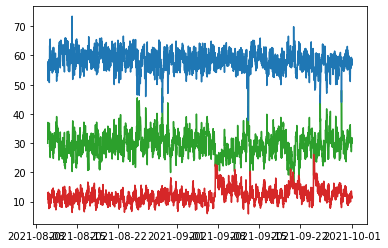

In [255]:
plot = thirty_mins_span

x = plot.index.values
#pos = plot['positive']
#neu = plot['neutral']
#neg = plot['negative']

pos = plot['pos_percent']
neu = plot['neu_percent']
neg = plot['neg_percent']

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

plt.plot(x,pos, color=mycolors[2])

plt.plot(x,neu, color=mycolors[1])
plt.plot(x,neg, color=mycolors[0])

plt.show()


In [238]:
thirty_mins_span


dateGroup,negative,neutral,positive,unknown,total,pos_percent,neu_percent,neg_percent
2021-08-10 00:00:00+00:00,228,1016,532,0,1776,29.954955,57.207207,12.837838
2021-08-10 00:30:00+00:00,171,764,551,0,1486,37.079408,51.413190,11.507402
2021-08-10 01:00:00+00:00,176,795,449,0,1420,31.619718,55.985915,12.394366
2021-08-10 01:30:00+00:00,154,700,441,0,1295,34.054054,54.054054,11.891892
2021-08-10 02:00:00+00:00,144,779,421,0,1344,31.324405,57.961310,10.714286
...,...,...,...,...,...,...,...,...
2021-09-30 21:30:00+00:00,364,1618,832,0,2814,29.566453,57.498223,12.935323
2021-09-30 22:00:00+00:00,294,1436,798,0,2528,31.566456,56.803797,11.629747
2021-09-30 22:30:00+00:00,280,1374,774,0,2428,31.878089,56.589786,11.532125
2021-09-30 23:00:00+00:00,270,1304,708,0,2282,31.025416,57.142857,11.831727


In [211]:
bitcoin_prices = pd.read_csv('../data/external/Bitstamp_BTCUSD_2021_minute_final.csv', header = 1)


In [213]:
bitcoin_prices[-5:]


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
572113,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
572114,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
572115,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
572116,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
572117,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397


In [256]:
bpd = bitcoin_prices[['date', 'open', 'Volume BTC']]
bpd['dateTime'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)
#bpd['Date'] = bpd['SPdateTime'].dt.strftime('%Y-%m-%d')
bpd = bpd.set_index('dateTime')

bpd.info()
bpd.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572118 entries, 2022-02-02 07:18:00+00:00 to 2021-01-01 00:01:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        572118 non-null  object 
 1   open        572118 non-null  float64
 2   Volume BTC  572118 non-null  float64
dtypes: float64(2), object(1)
memory usage: 17.5+ MB


/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_64230/1792548413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpd['dateTime'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)


,date,open,Volume BTC
dateTime,,,
2022-02-02 07:18:00+00:00,2022-02-02 07:18:00,38313.00,1.207183
2022-02-02 07:17:00+00:00,2022-02-02 07:17:00,38326.25,1.897339
2022-02-02 07:16:00+00:00,2022-02-02 07:16:00,38360.83,1.402947
2022-02-02 07:15:00+00:00,2022-02-02 07:15:00,38355.73,0.023387
2022-02-02 07:14:00+00:00,2022-02-02 07:14:00,38343.82,0.002370


In [280]:
import datetime


def fetch_prices(df, span_mins):
    c_dts = df.index
    dts_1 = c_dts + datetime.timedelta(minutes=span_mins)
    dts_2 = c_dts + datetime.timedelta(minutes=(span_mins*2))
    dts_3 = c_dts + datetime.timedelta(minutes=(span_mins*3))
    dts_4 = c_dts + datetime.timedelta(minutes=(span_mins*4))

    
    print(bpd.loc[c_dts]['open'].reset_index(drop=True))
    print(bpd.loc[dts_1]['open'].reset_index(drop=True))
    print(bpd.loc[dts_2]['open'].reset_index(drop=True))
    print(bpd.loc[dts_3]['open'].reset_index(drop=True))
    print(bpd.loc[dts_4]['open'].reset_index(drop=True))

    df['cp'] = bpd.loc[c_dts]['open']
    #df['1spanp'] = bpd.loc[dts_1]['open'].reset_index(drop=True)
    #df['2spanp'] = bpd.loc[dts_2]['open'].reset_index(drop=True)
    #df['3spanp'] = bpd.loc[dts_3]['open'].reset_index(drop=True)
    #df['4spanp'] = bpd.loc[dts_3]['open'].reset_index(drop=True)

#calc_percentage(thirty_mins_span)
#calc_percentage(one_h_span)
#calc_percentage(daily_span)
fetch_prices(two_h_span, 120)

two_h_span

0      46282.30
1      45978.39
2      45713.23
3      45571.40
4      45946.71
         ...   
619    43075.00
620    43152.20
621    43302.65
622    43545.62
623    43761.52
Name: open, Length: 624, dtype: float64
0      45978.39
1      45713.23
2      45571.40
3      45946.71
4      45998.33
         ...   
619    43152.20
620    43302.65
621    43545.62
622    43761.52
623    43835.47
Name: open, Length: 624, dtype: float64
0      45713.23
1      45571.40
2      45946.71
3      45998.33
4      45382.90
         ...   
619    43302.65
620    43545.62
621    43761.52
622    43835.47
623    43746.20
Name: open, Length: 624, dtype: float64
0      45571.40
1      45946.71
2      45998.33
3      45382.90
4      45570.72
         ...   
619    43545.62
620    43761.52
621    43835.47
622    43746.20
623    43650.49
Name: open, Length: 624, dtype: float64
0      45946.71
1      45998.33
2      45382.90
3      45570.72
4      45196.39
         ...   
619    43761.52
620    43835.47
621    4

dateGroup,negative,neutral,positive,unknown,total,pos_percent,neu_percent,neg_percent,cp,1spanp,2spanp,3spanp,4spanp
2021-08-10 00:00:00+00:00,729,3275,1973,0,5977,33.009871,54.793375,12.196754,46282.30,NaN,NaN,NaN,NaN
2021-08-10 02:00:00+00:00,561,2761,1682,0,5004,33.613110,55.175859,11.211031,45978.39,NaN,NaN,NaN,NaN
2021-08-10 04:00:00+00:00,413,2356,1452,0,4221,34.399431,55.816157,9.784411,45713.23,NaN,NaN,NaN,NaN
2021-08-10 06:00:00+00:00,516,2793,1637,0,4946,33.097452,56.469875,10.432673,45571.40,NaN,NaN,NaN,NaN
2021-08-10 08:00:00+00:00,466,3313,1578,0,5357,29.456786,61.844316,8.698899,45946.71,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 14:00:00+00:00,1874,8342,5146,0,15362,33.498242,54.302825,12.198932,43075.00,NaN,NaN,NaN,NaN
2021-09-30 16:00:00+00:00,1758,8478,5138,0,15374,33.420060,55.145050,11.434890,43152.20,NaN,NaN,NaN,NaN
2021-09-30 18:00:00+00:00,1950,8916,4658,0,15524,30.005153,57.433651,12.561196,43302.65,NaN,NaN,NaN,NaN
2021-09-30 20:00:00+00:00,1572,6986,3502,0,12060,29.038143,57.927032,13.034826,43545.62,NaN,NaN,NaN,NaN
